In [4]:
import operator
from typing import Annotated, Any
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
import time
class State(TypedDict):
    # The operator.add reducer fn makes this append-only
    aggregate: Annotated[list, operator.add]
    timestamps: Annotated[list, operator.add]

def a(state: State):
    print(f'Adding "A" to {state["aggregate"]}')
    return {"aggregate": ["A"], "timestamps": [('A', time.time())]}

def b(state: State):
    print(f'Starting B')
    time.sleep(1)  # Simulate a semi-fast task
    print(f'Adding "B" to {state["aggregate"]}')
    return {"aggregate": ["B"], "timestamps": [('B', time.time())]}

def b_2(state: State):
    print(f'Starting B_2')
    time.sleep(1)  # Simulate a semi-fast task
    print(f'Adding "B_2" to {state["aggregate"]}')
    return {"aggregate": ["B_2"], "timestamps": [('B_2', time.time())]}

def c(state: State):
    print(f'Starting C')
    time.sleep(5) # Simulate a slow task
    print(f'Adding "C" to {state["aggregate"]}')
    return {"aggregate": ["C"], "timestamps": [('C', time.time())]}

def d(state: State):
    print(f'Adding "D" to {state["aggregate"]}')
    return {"aggregate": ["D"], "timestamps": [('D', time.time())]}

builder = StateGraph(State)
builder.add_node(a)
builder.add_node(b)
builder.add_node(b_2)
builder.add_node(c)
builder.add_node(d, defer=True)
builder.add_edge(START, "a")
builder.add_edge("a", "b")
builder.add_edge("a", "c")
builder.add_edge("b", "b_2")
builder.add_edge("b_2", "d")
builder.add_edge("c", "d")
builder.add_edge("d", END)
graph = builder.compile()

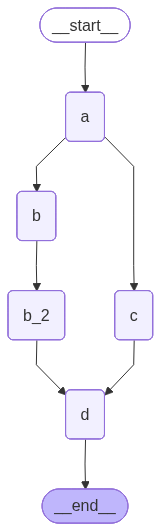

In [5]:
from IPython.display import Image, display

png_data = graph.get_graph().draw_mermaid_png()
display(Image(png_data))

In [6]:
graph.invoke({"aggregate": []})

Adding "A" to []
Starting B
Starting C
Adding "B" to ['A']
Adding "C" to ['A']
Starting B_2
Adding "B_2" to ['A', 'B', 'C']
Adding "D" to ['A', 'B', 'C', 'B_2']


{'aggregate': ['A', 'B', 'C', 'B_2', 'D'],
 'timestamps': [('A', 1758836947.019758),
  ('B', 1758836948.0266418),
  ('C', 1758836952.0251899),
  ('B_2', 1758836953.0322402),
  ('D', 1758836953.034576)]}